In [0]:
import pandas as pd
import json


## Análisis de datos de g

### 1. Referencia del listado de campos

https://docs.google.com/document/d/15ijz94dXJ-YAZLi9iZ_RaBwrZ4KtYeCy08goGBwnbCU/edit


### 2. Leer PurpleAir.json

Es necesario entrar al mapa ( https://www.purpleair.com/map?mylocation ) y usar el inspector de Chrome para obtener el ID del sensor (json?show=ID)


![title](https://github.com/tozanni/airhacking_ddmty2019/blob/master/obtener-json.png?raw=1)

In [0]:
j = pd.read_json("https://www.purpleair.com/json?show=31843")


In [0]:
j

,baseVersion,mapVersion,mapVersionString,results
0,6,0.85,,"{'ID': 31843, 'Label': 'Nuevo Sur', 'DEVICE_LO..."
1,6,0.85,,"{'ID': 31844, 'ParentID': 31843, 'Label': 'Nue..."


Los resultados vienen por duplicados ya que cada equipo tiene dos sensores por redundancia. 

Posteriormente, cada sensor tiene dos canales de datos (Primary y Secondary), esto por limitaciones del API de Thingspeak.

Nos interesa principalmente obtener los siguientes datos:

- **THINGSPEAK_PRIMARY_ID**: ID del canal primario de datos.
 
- **THINGSPEAK_PRIMARY_ID_READ_KEY**: Llave de lectura para Thingspeak


In [0]:
# Sensor primario
j.loc[0]["results"]

{'ID': 31843,
 'Label': 'Nuevo Sur',
 'DEVICE_LOCATIONTYPE': 'outside',
 'THINGSPEAK_PRIMARY_ID': '779958',
 'THINGSPEAK_PRIMARY_ID_READ_KEY': 'I93BJE92YBMDS6D5',
 'THINGSPEAK_SECONDARY_ID': '779959',
 'THINGSPEAK_SECONDARY_ID_READ_KEY': '4GZZP2LIK2X8G5L0',
 'Lat': 25.652478,
 'Lon': -100.27323,
 'PM2_5Value': '3.01',
 'LastSeen': 1567548179,
 'Type': 'PMS5003+PMS5003+BME280',
 'Hidden': 'false',
 'DEVICE_BRIGHTNESS': '15',
 'DEVICE_HARDWAREDISCOVERED': '2.0+BME280+PMSX003-B+PMSX003-A',
 'Version': '4.10',
 'LastUpdateCheck': 1567544937,
 'Uptime': '10570',
 'RSSI': '-66',
 'Adc': '0.02',
 'isOwner': 0,
 'temp_f': '95',
 'humidity': '22',
 'pressure': '954.81',
 'AGE': 0,
 'Stats': '{"v":3.01,"v1":3.66,"v2":4.96,"v3":6.29,"v4":8.55,"v5":12.96,"v6":18.47,"pm":3.01,"lastModified":1567548179645,"timeSinceModified":119947}'}

In [0]:
# Sensor secundario
j.loc[1]["results"]

{'ID': 31844,
 'ParentID': 31843,
 'Label': 'Nuevo Sur B',
 'THINGSPEAK_PRIMARY_ID': '779960',
 'THINGSPEAK_PRIMARY_ID_READ_KEY': 'M9S9QIAAXXTM46DW',
 'THINGSPEAK_SECONDARY_ID': '779961',
 'THINGSPEAK_SECONDARY_ID_READ_KEY': '15JY1JNZ57GF8YPT',
 'Lat': 25.652478,
 'Lon': -100.27323,
 'PM2_5Value': '2.32',
 'LastSeen': 1567548179,
 'Hidden': 'false',
 'Adc': '0.02',
 'isOwner': 0,
 'AGE': 0,
 'Stats': '{"v":2.32,"v1":3.48,"v2":4.81,"v3":6.12,"v4":8.33,"v5":12.75,"v6":18.21,"pm":2.32,"lastModified":1567548179645,"timeSinceModified":119946}'}

Para verificar la confiabilidad del equipo hay que comparar las lecturas de sus dos sensores internos y validar que sean similares con (Stats)


### Lectura usando el API de Thingspeak

https://thingspeak.readthedocs.io/en/latest/api.html
    

#### Opciones

https://la.mathworks.com/help/thingspeak/readdata.html
    

In [0]:
#!pip install thingspeak
import thingspeak

In [0]:
channel_id = 779958
read_key = 'I93BJE92YBMDS6D5'

tz = 'America/Monterrey'

channel = thingspeak.Channel(id=channel_id,api_key=read_key)

# Ultimos 2000 lecturas
#jj = channel.get_field(field='field2', options = {'results': 2000})

## Todas las lecturas en los rangos de fechas especificados
#jj = channel.get_field(field='field2', options = {'start':'2019-05-15T00:00:00Z','end':'2019-05-18T00:00:00Z'})

### Lecturas de PM2.5
jj = channel.get_field(field='field8', options = {'start':'2019-08-25T00:00:00Z',
                                                  'end':'2019-08-29T00:00:00Z',
                                                  #'average':'daily',
                                                  'timezone':tz})


In [0]:
#jj

In [0]:
json_data = json.loads(jj)
json_data["feeds"]

[{'created_at': '2019-08-24T19:01:27-05:00',
  'entry_id': 58531,
  'field8': '18.09'},
 {'created_at': '2019-08-24T19:03:27-05:00',
  'entry_id': 58532,
  'field8': '19.22'},
 {'created_at': '2019-08-24T19:05:27-05:00',
  'entry_id': 58533,
  'field8': '19.51'},
 {'created_at': '2019-08-24T19:07:27-05:00',
  'entry_id': 58534,
  'field8': '17.81'},
 {'created_at': '2019-08-24T19:09:27-05:00',
  'entry_id': 58535,
  'field8': '18.08'},
 {'created_at': '2019-08-24T19:11:27-05:00',
  'entry_id': 58536,
  'field8': '26.61'},
 {'created_at': '2019-08-24T19:13:27-05:00',
  'entry_id': 58537,
  'field8': '29.07'},
 {'created_at': '2019-08-24T19:15:27-05:00',
  'entry_id': 58538,
  'field8': '23.34'},
 {'created_at': '2019-08-24T19:17:27-05:00',
  'entry_id': 58539,
  'field8': '19.02'},
 {'created_at': '2019-08-24T19:19:27-05:00',
  'entry_id': 58540,
  'field8': '20.31'},
 {'created_at': '2019-08-24T19:21:27-05:00',
  'entry_id': 58541,
  'field8': '22.58'},
 {'created_at': '2019-08-24T19:2

## Creación de dataframe con Pandas con el campo de JSON

- Tomamos el valor del campo created_at como timestamp
- Tomamos el valor de la lectura de field8 (PM2.5)


In [0]:

df = pd.DataFrame.from_dict(json_data["feeds"])

df["datetime"] = pd.to_datetime(df["created_at"])

df.drop(["created_at","entry_id"], axis=1,inplace=True)

df.rename(columns={"field8":"PM2.5_CF_ATM_ug/m3"},inplace=True)

df.set_index("datetime",inplace=True)

#df

In [0]:
df.head()

,PM2.5_CF_ATM_ug/m3
datetime,
2019-08-25 00:01:27,18.09
2019-08-25 00:03:27,19.22
2019-08-25 00:05:27,19.51
2019-08-25 00:07:27,17.81
2019-08-25 00:09:27,18.08


## Opción B: Trabajando con archivos descargados

Estos archivos pueden obtenerse desde:

https://map.purpleair.org/sensorlist

**OJO:** Es una página MUY lenta (>5min en desplegar)

In [0]:
def prepare(df):
    
    #Eliminar columnas innecesarias
    df.drop("Unnamed: 10", axis=1, inplace=True)
    
    #Conversion de tipo de datos
    df["datetime"] = pd.to_datetime(df.created_at)
    
    #Eliminar columnas innecesarias
    df.drop(["created_at","entry_id"],axis=1,inplace=True)
    
    #Crear indice en la columna datetime
    df.set_index("datetime",inplace=True)
    
    # Crear una columna por dia
    df['date'] = df.index.date
    return df

# Tip: Cambiar el nombre original a algo mas sencillo
df0 = pd.read_csv("PrivMontana Primary 04_01_2019 05_01_2019.csv")

df1 = pd.read_csv("La Pastora Primary 04_01_2019 05_01_2019.csv")


In [0]:
df0

,created_at,entry_id,PM1.0_CF_ATM_ug/m3,PM2.5_CF_ATM_ug/m3,PM10.0_CF_ATM_ug/m3,UptimeMinutes,ADC,Temperature_F,Humidity_%,PM2.5_CF_1_ug/m3,Unnamed: 10
0,2019-04-01 00:01:15 UTC,14239,23.42,35.87,39.40,1431.0,-59.0,72.0,32.0,33.22,NaN
1,2019-04-01 00:02:31 UTC,14240,21.07,33.68,38.11,1433.0,-57.0,72.0,32.0,31.82,NaN
2,2019-04-01 00:03:50 UTC,14241,18.65,28.91,31.86,1434.0,-56.0,72.0,33.0,28.51,NaN
3,2019-04-01 00:05:07 UTC,14242,17.23,28.66,31.84,1435.0,-60.0,71.0,32.0,28.57,NaN
4,2019-04-01 00:06:27 UTC,14243,17.59,29.77,31.80,1437.0,-59.0,71.0,33.0,29.48,NaN
5,2019-04-01 00:07:47 UTC,14244,17.24,26.63,28.57,1438.0,-58.0,70.0,33.0,26.52,NaN
6,2019-04-01 00:09:10 UTC,14245,15.74,24.37,26.50,1439.0,-58.0,70.0,34.0,24.37,NaN
7,2019-04-01 00:10:28 UTC,14246,16.00,24.30,27.02,1441.0,-58.0,70.0,34.0,24.30,NaN
8,2019-04-01 00:11:47 UTC,14247,16.56,25.13,27.82,1442.0,-59.0,69.0,34.0,25.13,NaN
9,2019-04-01 00:13:07 UTC,14248,15.93,24.44,27.40,1443.0,-60.0,69.0,34.0,24.44,NaN


In [0]:
df = prepare(df0)

In [0]:
df[["PM2.5_CF_ATM_ug/m3"]].head()

,PM2.5_CF_ATM_ug/m3
datetime,
2019-04-01 00:01:15,35.87
2019-04-01 00:02:31,33.68
2019-04-01 00:03:50,28.91
2019-04-01 00:05:07,28.66
2019-04-01 00:06:27,29.77


### Cálculo de índices (PM2.5 AQI)

El truco es usar DatFrame.resample

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html


In [0]:
import matplotlib as plt

# Concentracion promedio diaria (a partir de la serie de minutos)
df[['date','PM2.5_CF_ATM_ug/m3']].groupby(['date']).mean()

pm25_daily_avg = df[['date','PM2.5_CF_ATM_ug/m3','PM1.0_CF_ATM_ug/m3']].resample('D').mean()

#pm25_daily_avg
pm25_daily_avg.plot()

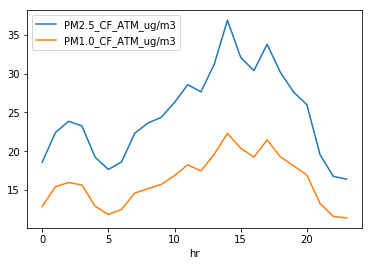

In [0]:
# Calcular el promedio por hora del dia

pm25_hr_avg = df[['date','PM2.5_CF_ATM_ug/m3','PM1.0_CF_ATM_ug/m3']].resample('h').mean()

pm25_hr_avg['hr'] = pm25_hr_avg.index.hour

pm25_hr_avg.groupby('hr').mean().plot()


### ¿Cuántos días hay por cada categoría de AQI?

In [0]:
# Basadas en el calculo de
# https://airnow.gov/index.cfm?action=airnow.calculator
# PM2.5 es la recomendacion de la OMS

def Linear(AQIhigh, AQIlow, Conchigh, Conclow, Conc):
    a=((Conc-Conclow)/(Conchigh-Conclow))*(AQIhigh-AQIlow)+AQIlow;
    return round(a)

def AQIPM25(Conc):
    import math
    c=(math.floor(10*Conc))/10
    AQI = 0
    
    if (c>=0 and c<12.1):
        AQI=Linear(50,0,12,0,c)
    elif (c>=12.1 and c<35.5):
        AQI=Linear(100,51,35.4,12.1,c)
    elif (c>=35.5 and c<55.5):
        AQI=Linear(150,101,55.4,35.5,c)
    elif (c>=55.5 and c<150.5):
        AQI=Linear(200,151,150.4,55.5,c)
    elif (c>=150.5 and c<250.5):
        AQI=Linear(300,201,250.4,150.5,c)
    elif (c>=250.5 and c<350.5):
        AQI=Linear(400,301,350.4,250.5,c)
    elif (c>=350.5 and c<500.5):
        AQI=Linear(500,401,500.4,350.5,c)
    return AQI

def AQICategory(AQI):
    if (AQI<=50):
        AQICategory="Good"
    elif (AQI>50 and AQI<=100):
        AQICategory="Moderate"
    elif(AQI>100 and AQI<=150):
        AQICategory="Unhealthy for Sensitive Groups"
    elif (AQI>150 and AQI<=200):
        AQICategory="Unhealthy"
    elif (AQI>200 and AQI<=300):
        AQICategory="Very Unhealthy"
    elif (AQI>300 and AQI<=400):
        AQICategory="Hazardous"
    elif (AQI>400 and AQI<=500):
        AQICategory="Hazardous"
    else:
        AQICategory="Out of Range"
    
    return AQICategory



def IMECA25(Conc):
    imeca = 0
    
    if (Conc >= 0 and Conc <= 15.4):
        imeca = Conc*50 / 15.4
    elif (Conc >= 15.5 and Conc <= 40.4):
        imeca =  20.50 + Conc*49/24.9
    elif (Conc >= 40.5 and Conc <= 65.4 ):
        imeca =  21.30 + Conc*49/24.9
    elif (Conc >= 65.5 and Conc <= 150.4):
        imeca =  113.20 + Conc*49/84.9
    elif (Conc > 150.4):
        imeca = Conc*201/150.5
    
    return round(imeca)
    

In [0]:
pm25_daily_avg["AQI2.5"] = pm25_daily_avg["PM2.5_CF_ATM_ug/m3"].apply(AQIPM25)


pm25_daily_avg["IMECA2.5"] = pm25_daily_avg["PM2.5_CF_ATM_ug/m3"].apply(IMECA25)


pm25_daily_avg

,PM2.5_CF_ATM_ug/m3,PM1.0_CF_ATM_ug/m3,AQI2.5,IMECA2.5
datetime,,,,
2019-04-01,40.287549,22.778094,113,100
2019-04-02,60.053091,33.503228,153,139
2019-04-03,41.548452,23.529981,116,103
2019-04-04,27.772709,17.791688,84,75
2019-04-05,19.751608,13.995307,67,59
2019-04-06,28.511005,17.540688,85,77
2019-04-07,36.449232,23.390749,103,92
2019-04-08,13.508667,9.497343,54,44
2019-04-09,8.586778,6.395722,35,28


In [0]:
pm25_daily_avg["AQI_PM2.5_Cat"]  = pm25_daily_avg["AQI2.5"].apply(AQICategory)

pm25_daily_avg.groupby("AQI_PM2.5_Cat").count()

,PM2.5_CF_ATM_ug/m3,PM1.0_CF_ATM_ug/m3,AQI2.5,IMECA2.5
AQI_PM2.5_Cat,,,,
Good,8,8,8,8
Moderate,14,14,14,14
Unhealthy,2,2,2,2
Unhealthy for Sensitive Groups,5,5,5,5


### ¿Cuántos minutos al dia hemos pasado por arriba de una concentracion dada?

**OJO:** Los intervalos de muestreo no son exactamente iguales

In [0]:
#df[['date','PM2.5_CF_ATM_ug/m3']][df['PM2.5_CF_ATM_ug/m3'] > 40]

df[['date','PM2.5_CF_ATM_ug/m3']][df['PM2.5_CF_ATM_ug/m3'] > 40].groupby(['date']).count()


,PM2.5_CF_ATM_ug/m3
date,
2019-04-01,618
2019-04-02,895
2019-04-03,520
2019-04-04,211
2019-04-05,62
2019-04-06,242
2019-04-07,473
2019-04-08,2
2019-04-09,2


In [0]:
#pm25_day_avg = df[['date','PM2.5_CF_ATM_ug/m3']][df['PM2.5_CF_ATM_ug/m3'] > 40].groupby(['date']).count()

#pm25_day_avg = df[['date','PM2.5_CF_ATM_ug/m3']].groupby(['date']).mean()

#!pip install seaborn

In [0]:
import matplotlib.pyplot as plt
#import seaborn as sns

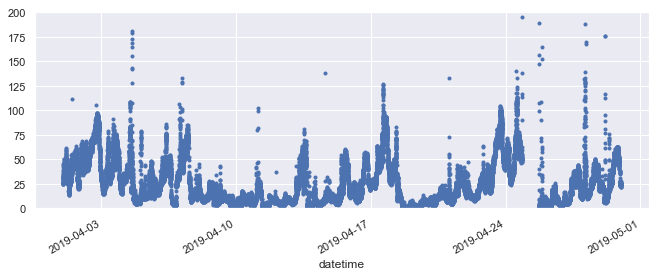

In [0]:
sns.set(rc={'figure.figsize':(11, 4)})
df['PM2.5_CF_ATM_ug/m3'].plot(marker=".",linewidth=0.5,ylim=(0,200),linestyle='None');

#pm25_day_avg['PM2.5_CF_ATM_ug/m3'].plot(marker=".",linewidth=0.5);

### ¿Cuáles son las variaciones por día de la semana?

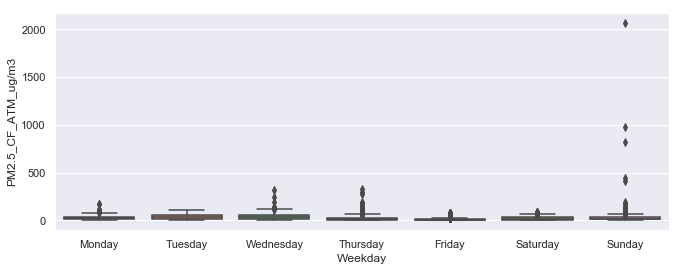

In [0]:
df['Weekday'] = df.index.weekday_name

#sns.boxplot(data=df.loc['2019-04-17':'2019-04-30'], x='Weekday', y='PM2.5_CF_ATM_ug/m3');

sns.boxplot(data=df, x='Weekday', y='PM2.5_CF_ATM_ug/m3');

In [0]:
data_columns = ['PM2.5_CF_ATM_ug/m3']

df_daily_mean = df[data_columns].resample('D').mean()

df_4hr_mean = df[data_columns].resample('4H').mean()

#df_4hr_mean

In [0]:
# Start and end of the date range to extract
start, end = '2019-04', '2019-05'

pd.to_datetime('2019-04-01')

Timestamp('2019-04-01 00:00:00')

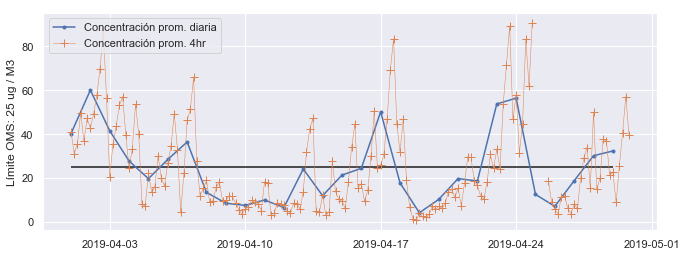

In [0]:
# Start and end of the date range to extract
start, end = '2019-04', '2019-05'

df_daily_mean.loc[start]

# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()

ax.hlines(25,pd.to_datetime('2019-04-01'),pd.to_datetime('2019-04-29'))

#ax.hlines(25,0,10)

ax.plot(df_daily_mean.loc[start:end, data_columns[0]], marker='.', linestyle='-', label='Concentración prom. diaria')

ax.plot(df_4hr_mean.loc[start:end, data_columns[0]], marker='+', markersize=8, linewidth=0.5, linestyle='-', label='Concentración prom. 4hr')

ax.set_ylabel('Límite OMS: 25 ug / M3')

ax.legend();
